In [3]:
from nltk import ne_chunk, pos_tag, word_tokenize
import nltk
nltk.download('maxent_ne_chunker')
nltk.download('words')
from datasets import load_dataset
from collections import Counter, defaultdict

from matplotlib import pyplot as plt
import numpy as np

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\Bruger\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Bruger\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [4]:
data = load_dataset('GonzaloA/fake_news')

Repo card metadata block was not found. Setting CardData to empty.


In [5]:
def compute_ratios(first: list, other: list) -> dict:
    '''
    returns the frequency for each element in first divided by its frequency in other
        - meant to show which elements are overrepresented in first compared to other
    '''
    first_counts = Counter(first)
    other_counts = Counter(other)

    ratios = {}

    for item in first_counts:
        if item in other_counts:
            ratios[item] = first_counts[item] / other_counts[item]
        else:
            # to avoid division by zero, pretends items absent in other occur once instead
            ratios[item] = first_counts[item] 

    return ratios

In [6]:
# splits up data by label
fake = []
true = []
for article in data['train']:
    if article['label'] == 1: # label == true
        true.append(article)
    else:# label == fake
        fake.append(article)


# merges and tokenizes the text of the fake/non-fake news
true_combined = ' '.join([article['text'] for article in true])
fake_combined = ' '.join([article['text'] for article in fake])
true_tokens = word_tokenize(true_combined)
fake_tokens = word_tokenize(fake_combined)

# computes token frequency in fake news / frequency in non-fake news (and vice versa) and sorts by ratio
true_ratios = compute_ratios(true_tokens, fake_tokens)
fake_ratios = compute_ratios(fake_tokens, true_tokens)
true_ratios_sorted = sorted(list(true_ratios.items()), key=lambda x: x[1], reverse=True)
fake_ratios_sorted = sorted(list(fake_ratios.items()), key=lambda x: x[1], reverse=True)

In [7]:
# prepares token ratios for plotting

# only plots top 10 highest ratios
n_tokens = 10

x_true = [token for token, _  in true_ratios_sorted[:n_tokens]]
x_fake = [token for token, _  in fake_ratios_sorted[:n_tokens]]
x_true.reverse()
x_fake.reverse()

y_true = [ratio for _, ratio in true_ratios_sorted[:n_tokens]]
y_fake = [ratio for _, ratio in fake_ratios_sorted[:n_tokens]]
y_true.reverse()
y_fake.reverse()

In [8]:
# samples article to save compute time on the following
size = 400
fake_sample = np.random.choice(fake, size=size)
true_sample = np.random.choice(true, size=size)

# does NER on non-fake news, storing all named entities in list
true_NE = []
true_combined = ' '.join([article['text'] for article in true_sample])
tags = pos_tag(word_tokenize(true_combined))
chunks = ne_chunk(tags)
n_chunks = len(chunks)
for i, chunk in enumerate(chunks):
    if hasattr(chunk, 'label'):
        true_NE.append(' '.join([word[0] for word in chunk]))

# does NER on fake news, storing all named entities in list
fake_NE = []
fake_combined = ' '.join([article['text'] for article in fake_sample])
tags = pos_tag(word_tokenize(fake_combined))
chunks = ne_chunk(tags)
n_chunks = len(chunks)
for i, chunk in enumerate(chunks):
    if hasattr(chunk, 'label'):
        fake_NE.append(' '.join([word[0] for word in chunk]))


# computes named entity frequency in fake news / frequency in non-fake news (and vice versa) and sorts by ratio
true_ratios_NE = compute_ratios(true_NE, fake_NE)
fake_ratios_NE = compute_ratios(fake_NE, true_NE)
true_ratios_sorted_NE = sorted(list(true_ratios_NE.items()), key=lambda x: x[1], reverse=True)
fake_ratios_sorted_NE = sorted(list(fake_ratios_NE.items()), key=lambda x: x[1], reverse=True)

In [9]:
# prepares named entity ratios for plotting

# only plots top 10 highest ratios
n_entities = 10

x_true_NE = [entities for entities, _  in true_ratios_sorted_NE[:n_entities]]
x_fake_NE = [entities for entities, _  in fake_ratios_sorted_NE[:n_entities]]
x_true_NE.reverse()
x_fake_NE.reverse()

y_true_NE = [ratio for _, ratio in true_ratios_sorted_NE[:n_entities]]
y_fake_NE = [ratio for _, ratio in fake_ratios_sorted_NE[:n_entities]]
y_true_NE.reverse()
y_fake_NE.reverse()

C:\Users\Bruger\AppData\Local\Temp\ipykernel_38648\970646631.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


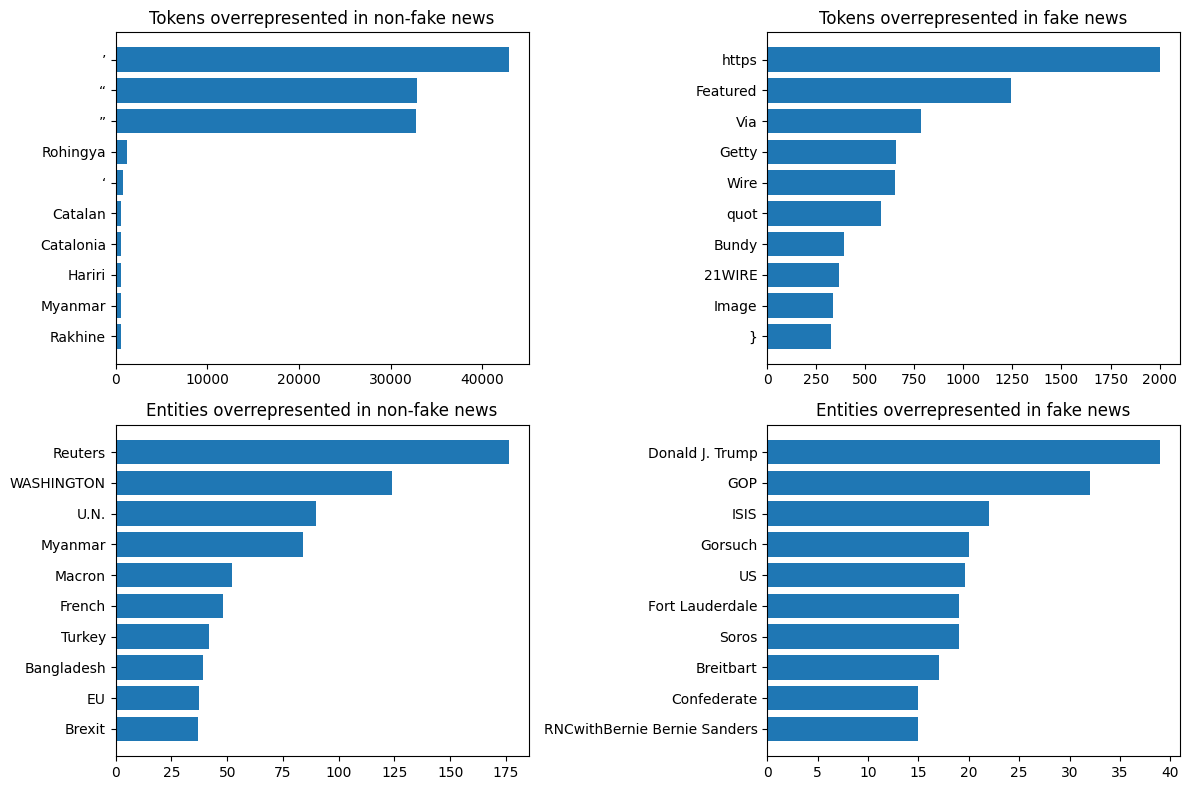

In [10]:
# plots all the ratios
fig, axs = plt.subplots(figsize=(12,8), nrows=2, ncols=2)

axs = axs.flatten()

axs[0].barh(x_true, y_true)
axs[0].set_title('Tokens overrepresented in non-fake news')

axs[1].barh(x_fake, y_fake)
axs[1].set_title('Tokens overrepresented in fake news')

axs[2].barh(x_true_NE, y_true_NE)
axs[2].set_title('Entities overrepresented in non-fake news')

axs[3].barh(x_fake_NE, y_fake_NE)
axs[3].set_title('Entities overrepresented in fake news')


fig.tight_layout()
fig.show()

In [ ]:
#with open('fake_tokens.txt', 'a') as f:
#    for token in sorted_:
#        f.write(f'{token[0]}, {token[1][0]}, {token[1][1][:10]}\n')

In [ ]:
# ------- splits up data by label and stores index --------
fake = []
true = []

for i, article in enumerate(data['train']):
    
    # saving index for further analysis
    info = {'text': article['text'], 'index': i}

    if article['label'] == 0: # label == fake
        fake.append(info)

    else: # label == true
        true.append(info)


# --------- tokenizes the text of the fake news and counts occurrences ----------- 
fake_counts = defaultdict(lambda: {'count': 0, 'articles': []})

for info in fake:
    text = info['text']
    index = info['index'] # stores document index for future analysis
    tokens = word_tokenize(text)

    for token in tokens:
        fake_counts[token]['count'] += 1
        fake_counts[token]['articles'].append(index)


# -------- tokenizes the text of non-fake news and counts occurrences -----------
true_combined = ' '.join([article['text'] for article in true])
true_tokens = word_tokenize(true_combined)
true_amounts = Counter(true_tokens)


# --------- computes token frequency in fake news / frequency in non-fake news --------
fake_tf = {}

for token in fake_counts:
    count = fake_counts[token]['count']
    articles = fake_counts[token]['articles']
    if token in true_amounts:
        fake_tf[token] = {'freq': count / true_amounts[token], 
                          'articles': articles}
    else:
        # pretends tokens not appearing in true appear once (to avoid dividing by zero)
        fake_tf[token] = {'freq': count, 
                          'articles': articles}


# -------- sorts and prints tokens with highest value = most particular to fake news --------
sorted_ = sorted(list(fake_tf.items()), key=lambda x: x[1]['freq'], reverse=True)
for token, info in sorted_:
    print(token, info['freq'], info['articles'][:10])

In [ ]:
n_tokens = 10

x = [token for token, _  in sorted_[:20]]
y = [articles['freq'] for _, articles in sorted_[:20]]

x.reverse()
y.reverse()

In [ ]:
fig, ax = plt.subplots(figsize=(12,12))

ax.barh(x, y)
ax.set_xticklabels(y, rotation=50, rotation_mode='anchor', ha='right')

fig.show()

In [ ]:
size = 400
fake_sample = np.random.choice(fake, size=size)
true_sample = np.random.choice(true, size=size)

In [ ]:
fake_NE = []
fake_combined = ' '.join([article['text'] for article in fake_sample])
tags = pos_tag(word_tokenize(fake_combined))
chunks = ne_chunk(tags)
n_chunks = len(chunks)
for i, chunk in enumerate(chunks):
    if hasattr(chunk, 'label'):
        fake_NE.append(' '.join([word[0] for word in chunk]))


true_NE = []
true_combined = ' '.join([article['text'] for article in true_sample])
tags = pos_tag(word_tokenize(true_combined))
chunks = ne_chunk(tags)
n_chunks = len(chunks)
for i, chunk in enumerate(chunks):
    if hasattr(chunk, 'label'):
        true_NE.append(' '.join([word[0] for word in chunk]))

In [ ]:
counts_fake_NE = Counter(fake_NE)
counts_true_NE = Counter(true_NE)

In [ ]:
fake_tf = {}

for token in counts_fake_NE:
    count = counts_fake_NE[token]
    if token in counts_true_NE:
        fake_tf[token] = count / counts_true_NE[token]
    else:
        # pretends tokens not appearing in true appear once (to avoid dividing by zero)
        fake_tf[token] = count


# -------- sorts and prints tokens with highest value = most particular to fake news --------
sorted_fake = sorted(list(fake_tf.items()), key=lambda x: x[1], reverse=True)
for token, count in sorted_:
    print(token, count)

In [ ]:
n_tokens = 20

x_fake = [token for token, _  in sorted_fake[:20]]
y_fake = [articles['freq'] for _, articles in sorted_fake[:20]]

x_fake.reverse()
y_fake.reverse()

fig, ax = plt.subplots(figsize=(12,12))

ax.barh(x_fake, y_fake)
ax.set_xticklabels(y_fake, rotation=50, rotation_mode='anchor', ha='right')

fig.show()

In [ ]:
true_tf = {}

for token in counts_true_NE:
    count = counts_true_NE[token]
    if token in counts_fake_NE:
        true_tf[token] = count / counts_fake_NE[token]
    else:
        # pretends tokens not appearing in fake appear once (to avoid dividing by zero)
        true_tf[token] = count


# -------- sorts and prints tokens with highest value = most particular to true news --------
sorted_ = sorted(list(true_tf.items()), key=lambda x: x[1], reverse=True)
for token, count in sorted_:
    print(token, count)

In [ ]:
n_tokens = 20

x_true = [token for token, _  in sorted_true[:20]]
y_true = [articles['freq'] for _, articles in sorted_true[:20]]

x_true.reverse()
y_true.reverse()

fig, ax = plt.subplots(figsize=(12,12))

ax.barh(x_true, y_true)
ax.set_xticklabels(y_true, rotation=50, rotation_mode='anchor', ha='right')

fig.show()

In [ ]:
counts_fake_NE